# Test model

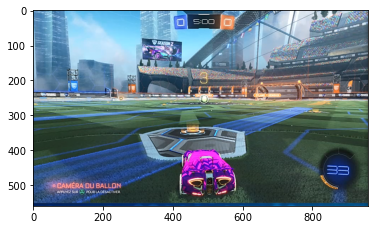

In [2]:
# Get image from AWS S3
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import urllib
import numpy as np
import cv2

def load_image(url):
    with urllib.request.urlopen(url) as response:
        image = np.asarray(bytearray(response.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = image[:, :, [2, 1, 0]] # BGR -> RGB
    return image

DATA_URL_ROOT = "https://aiworkflow.s3.eu-west-3.amazonaws.com/"
training_dataset = "2021-03-06-1"
selected_frame = "img_0.png"

image_url = os.path.join(DATA_URL_ROOT,training_dataset+"_"+selected_frame)
# image_url
image = load_image(image_url)
plt.imshow(image)

In [21]:
import pandas as pd
data_url = os.path.join(DATA_URL_ROOT,training_dataset+"_data.csv")
data = pd.read_csv(data_url,names=["img","x","y","r2","l2","r1"])
# data

In [20]:
# !pip install fsspec s3fs

data_s3 = "s3://aiworkflow/"+training_dataset+"_data.csv"
data = pd.read_csv(data_s3,names=["img","x","y","r2","l2","r1"])
data

,img,x,y,r2,l2,r1
0,samples/2021-03-06-1/img_0.png,-0.015747,-0.023621,0.000000,0.0,0
1,samples/2021-03-06-1/img_1.png,-0.015747,-0.023621,0.000000,0.0,0
2,samples/2021-03-06-1/img_2.png,-0.015747,-0.015747,0.000000,0.0,0
3,samples/2021-03-06-1/img_3.png,-0.015747,-0.023621,0.726562,0.0,0
4,samples/2021-03-06-1/img_4.png,-0.015747,-0.023621,0.996094,0.0,0
...,...,...,...,...,...,...
1667,samples/2021-03-06-1/img_1667.png,-0.007874,0.000000,0.000000,0.0,0
1668,samples/2021-03-06-1/img_1668.png,-0.007874,0.000000,0.000000,0.0,0
1669,samples/2021-03-06-1/img_1669.png,-0.007874,0.000000,0.000000,0.0,0
1670,samples/2021-03-06-1/img_1670.png,-0.007874,0.000000,0.000000,0.0,0


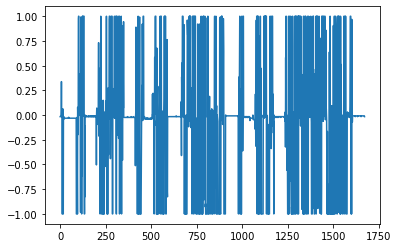

In [23]:
data.x.plot()

In [22]:
data.iloc[0].x

-0.0157470703125

In [42]:
# from skimage.color import rgb2gray
from skimage.transform import resize
# from skimage.io import imread

class Sample:
    IMG_W = 200
    IMG_H = 66
    IMG_D = 3

def resize_image(img):
    im = resize(img, (Sample.IMG_H, Sample.IMG_W, Sample.IMG_D))
    im_arr = im.reshape((Sample.IMG_H, Sample.IMG_W, Sample.IMG_D))
    return im_arr

In [44]:
from train import create_model

model = create_model(keep_prob=1)

## Look
vec = resize_image(image)
vec = np.expand_dims(vec, axis=0) # expand dimensions for predict, it wants (1,66,200,3) not (66, 200, 3)
## Think
joystick = model.predict(vec, batch_size=1)[0]

In [48]:
joystick[0]

-0.007983289